<a href="https://colab.research.google.com/github/mGomezJi/03MIAR--Algoritmos-de-Optimizacion/blob/main/Trabajo%20Practico%5CMiguel_Gomez_Jimenez_Trabajo_Practico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos: Miguel Gómez Jiménez   <br>
Url: https://github.com/mGomezJi/03MIAR--Algoritmos-de-Optimizacion<br>
Problema:
> 1. Sesiones de doblaje <br>
>2. Organizar los horarios de partidos de La Liga<br>
>3. Combinar cifras y operaciones

Descripción del problema:(copiar enunciado)

....

(*) La respuesta es obligatoria





                                        

Problema 3. Combinar cifras y operaciones

El problema consiste en analizar el siguiente problema y diseñar un algoritmo que lo resuelva.
• Disponemos de las 9 cifras del 1 al 9 (excluimos el cero) y de los 4 signos básicos de las
operaciones fundamentales: suma(+), resta(-), multiplicación(*) y división(/)
• Debemos combinarlos alternativamente sin repetir ninguno de ellos para obtener una cantidad
dada. Un ejemplo sería para obtener el 4:
4+2-6/3*1 = 4

Debe analizarse el problema para encontrar todos los valores enteros posibles planteando las
siguientes cuestiones:
- ¿Qué valor máximo y mínimo se pueden obtener según las condiciones del problema?
- ¿Es posible encontrar todos los valores enteros posibles entre dicho mínimo y máximo ?
• Nota: Es posible usar la función de python “eval” para evaluar una expresión:

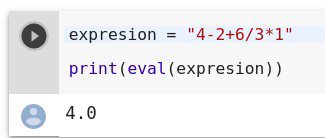

(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>



¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.




Respuesta

In [1]:
#(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?
sin_restricciones = (9*4)*(9*4)*(9*4)*(9*4)*9
print('Sin restricciones: ', sin_restricciones)

#¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.
con_restricciones = (9*4)*(8*3)*(7*2)*(6*1)*5
print('Con restricciones: ', con_restricciones)

Sin restricciones:  15116544
Con restricciones:  362880


Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)


Respuesta

In [2]:
#He considerado que la mejor estructura de datos que se adapta al problema es tener dos listas de caracteres, una para las cifras y otra para los operadores.

cifras=['1','2','3','4','5','6','7','8','9']
operadores=['+','-','*','/']

#He elegido esta solución por su sencillez, y porque de manera sencilla me permitía tener organizados los datos del problema.

Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?

(*)¿Es un problema de maximización o minimización?

Respuesta

In [3]:
#(*)¿Cual es la función objetivo?
def comprobar_resultado(expresion, resultado):
    return eval(expresion) == int(resultado)
#Dicha función permite verificar si la expresión pasada por parámetro cumple el resultado esperado

#(*)¿Es un problema de maximización o minimización?
#Es de minimización, ya que lo que se pretende es minimizar el tiempo necesario para encontrar la solución

Diseña un algoritmo para resolver el problema por fuerza bruta

Respuesta

In [4]:
def combinar_cifras_operaciones(cifras, operadores, resultado):
    iteracion = 0
    for n1 in cifras:
        for o1 in operadores:
            for n2 in cifras:
                for o2 in operadores:
                    for n3 in cifras:
                        for o3 in operadores:
                            for n4 in cifras:
                                for o4 in operadores:
                                    for n5 in cifras:
                                        if (n1 != n2 and n1 != n3 and n1 != n4 and n1 != n5) \
                                        and (o1 != o2 and o1 != o3 and o1 != o4) \
                                        and (n2 != n3 and n2 != n4 and n2 != n5) \
                                        and (o2 != o3 and o2 != o4) \
                                        and (n3 != n4 and n3 != n5) \
                                        and (o3 != o4) \
                                        and (n4 != n5):
                                            iteracion += 1                                            
                                            expresion = n1 + o1 + n2 + o2 + n3 + o3 + n4 + o4 + n5
                                            if comprobar_resultado(expresion, resultado):
                                                print('Una solución es ' + expresion+'='+resultado + ' obtenida en la iteración ', iteracion)
                                                return expresion+'='+resultado

combinar_cifras_operaciones(cifras, operadores, '4')                                           

Una solución es 1+3*8/2-9=4 obtenida en la iteración  2015


'1+3*8/2-9=4'

Calcula la complejidad del algoritmo por fuerza bruta

Respuesta

In [16]:
#El orden de complejidad del algoritmo por fueza bruta es O(n^9), debido a los nueve bucles anidados

(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta

In [5]:
import random

def generar_solucion_aleatoria(cifras, operadores): 
    #Cifras aleatorias
    aC = random.sample(list(cifras), 5)
    #Operadores aleatorios
    aO = random.sample(list(operadores), 4)
    
    return aC[0] + aO[0] + aC[1] + aO[1] + aC[2] + aO[2] + aC[3] + aO[3] + aC[4]

generar_solucion_aleatoria(cifras, operadores)

'3/2+4*8-1'

In [11]:
def busqueda_aleatoria(cifras, operadores, resultado, itentos):
    iteracion = 0
    expresion = generar_solucion_aleatoria(cifras, operadores)
    while (comprobar_resultado(expresion, resultado) == False) and (iteracion < itentos):
        iteracion += 1 
        expresion = generar_solucion_aleatoria(cifras, operadores)
    
    if iteracion == itentos:
      expresion = 'No se ha llegado a encontrar solución'
    else:
      expresion += '='+resultado
      print('Una solución es ' + expresion + ' obtenida en la iteración ', iteracion)
    
    return expresion
   
busqueda_aleatoria(cifras, operadores, '4', 1000) 

Una solución es 2+5/3*6-8=4 obtenida en la iteración  61


'2+5/3*6-8=4'

(*)Calcula la complejidad del algoritmo 

Respuesta

In [12]:
#(*)Calcula la complejidad del algoritmo 
#Es Orden lineal O(n), ya que el un único bucle que ha hay, está limitado a un número de intentos máximo o que se que se encuentre una solución. 
#Es decir, en el peor de los casos va a dar N vueltas, pero no se garantiza encontrar una solución.

Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta

In [ ]:
#Como se puede observar, ya se está generando una entrada de datos aleatoria en el método "generar_solucion_aleatoria"

Aplica el algoritmo al juego de datos generado

Respuesta

In [ ]:
#En el método "busqueda_aleatoria" ya se está aplicando

Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Respuesta

In [13]:
#Se ha utilizando los apuntes de clase

Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta

In [14]:
#Se puede avanzar en el estudio del problema utilizando otras técnicas de búsqueda, con la Búsqueda por vecindad, generando inicialmente una solución aleatoria.
#E incluso con la utilización de Algoritmos genétitos, donde inicialmente se generaría una población aleatoria, y después mediante técnicas de mutación y cruce, llegar a la solución.